##### General Notes
- Dataset consists of 240 starts

##### Star Types
1. Brown Dwarf      -> 0
1. Red Dwarf        -> 1
1. White Dwarf      -> 2
1. Main Sequence    -> 3
1. Supergiant Dwarf -> 4
1. Hypergiant       -> 5

In [150]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
data_file = "C:/Users/Josh/Desktop/My_Docs/Kaggle/Datasets/space/6 class.csv"
star_df = pd.read_csv(data_file)

In [152]:
star_df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [153]:
star_df.min(0)

Temperature (K)              1939
Luminosity(L/Lo)          0.00008
Radius(R/Ro)               0.0084
Absolute magnitude(Mv)     -11.92
Star type                       0
Star color                   Blue
Spectral Class                  A
dtype: object

In [154]:
set(star_df["Star color"])

{'Blue',
 'Blue ',
 'Blue White',
 'Blue white',
 'Blue white ',
 'Blue-White',
 'Blue-white',
 'Orange',
 'Orange-Red',
 'Pale yellow orange',
 'Red',
 'White',
 'White-Yellow',
 'Whitish',
 'Yellowish',
 'Yellowish White',
 'white',
 'yellow-white',
 'yellowish'}

In [155]:
star_df["Star color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
white                   3
Blue white              3
Orange                  2
Whitish                 2
yellowish               2
Pale yellow orange      1
Blue white              1
Blue-White              1
White-Yellow            1
Orange-Red              1
Yellowish               1
Blue                    1
Name: Star color, dtype: int64

In [156]:
for idx, c in enumerate(star_df["Star color"]):

    c = c.lower().replace(" ", "-")

    if c[-1] == "-":
        c = c[:-1]
        
    star_df["Star color"][idx] = c

<ipython-input-156-8113ee72b63e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df["Star color"][idx] = c


In [157]:
set(star_df["Star color"])

{'blue',
 'blue-white',
 'orange',
 'orange-red',
 'pale-yellow-orange',
 'red',
 'white',
 'white-yellow',
 'whitish',
 'yellow-white',
 'yellowish',
 'yellowish-white'}

In [158]:
star_df["Star color"].value_counts()

red                   112
blue                   56
blue-white             41
white                  10
yellow-white            8
yellowish-white         3
yellowish               3
whitish                 2
orange                  2
white-yellow            1
pale-yellow-orange      1
orange-red              1
Name: Star color, dtype: int64

In [159]:
colormatch = {"red": "red", 
            "blue": "blue", 
            "blue-white": "powderblue", 
            "white": "lightgrey", 
            "yellow-white": "lightyellow", 
            "yellowish-white": "lightyellow",
            "yellowish": "yellow",
            "white-yellow": "lightyellow",
            "whitish": "lightcyan",
            "orange": "orange",
            "orange-red": "orangered",
            "pale-yellow-orange": "gold"}

for idx, c in enumerate(star_df["Star color"]):
    star_df["Star color"][idx] = colormatch[c]

<ipython-input-159-871b15011601>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df["Star color"][idx] = colormatch[c]


In [160]:
star_df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M
5,2840,0.000650,0.1100,16.98,0,red,M
6,2637,0.000730,0.1270,17.22,0,red,M
7,2600,0.000400,0.0960,17.40,0,red,M
8,2650,0.000690,0.1100,17.45,0,red,M
9,2700,0.000180,0.1300,16.05,0,red,M


In [195]:
# Temperature x axis
# Absolute Magnitude y axis

star_temps = list(star_df["Temperature (K)"])
star_magnitude = list(star_df["Absolute magnitude(Mv)"])
star_colour = list(star_df["Star color"])
star_radius = list(star_df["Radius(R/Ro)"])

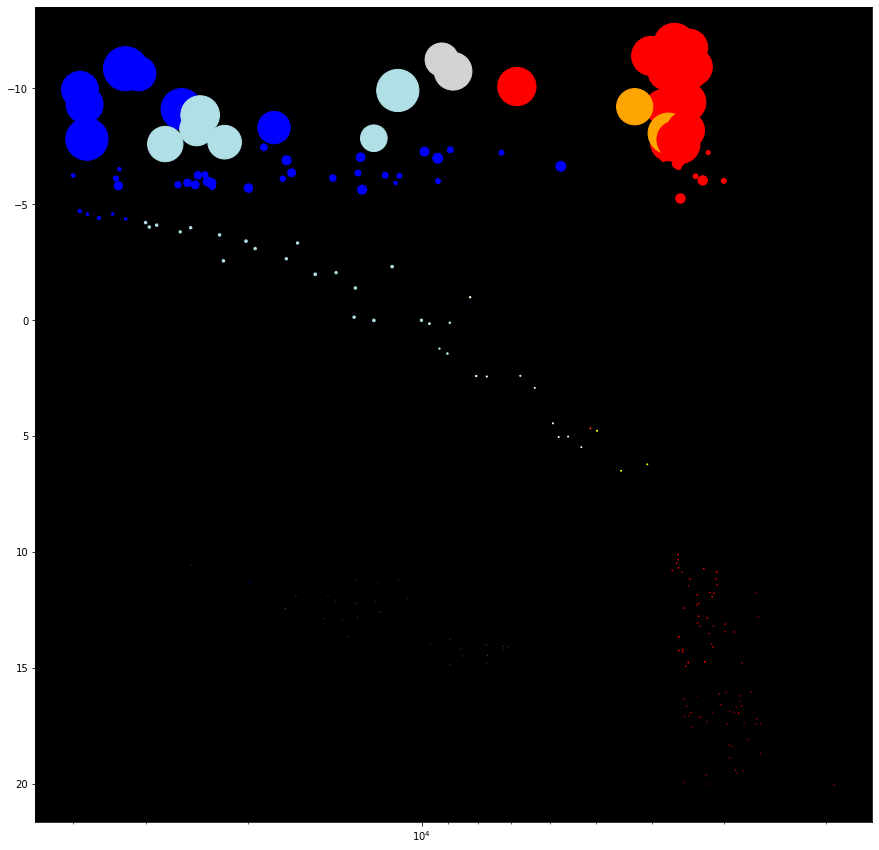

In [196]:

plt.figure(figsize=(15,15)) 
plt.scatter(star_temps, star_magnitude, c=star_colour, s=star_radius)
ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale("log")
ax.set_facecolor("black")
plt.show()